In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def TableSubTypesErrors(morf_codificata, FoundFN_IDs, FoundFP_IDs, ids, size):
    # Create a DataFrame for the combined table
    unique_values = morf_codificata.unique()
    sorted_ids_errors = sorted(FoundFN_IDs + FoundFP_IDs, key=lambda x: int(x.split('_')[1]))
    table_df = pd.DataFrame({'patient': sorted_ids_errors})

    # Add columns for each unique value in morf_codificata and initialize with empty strings
    for value in sorted(map(int, unique_values)):
        table_df[value] = ''

    # Populate the DataFrame with 'x' for FN and FP with color labels
    for patient in FoundFN_IDs:
        if patient in ids.values:
            morf_value = morf_codificata[ids == patient].values[0]
            if morf_value in unique_values:
                table_df.loc[table_df['patient'] == patient, morf_value] = 'FN'
            else:
                print("There is a problem with FN!")
        else:
            print("Patient not found in FN IDs!")

    for patient in FoundFP_IDs:
        if patient in ids.values:
            morf_value = morf_codificata[ids == patient].values[0]
            if morf_value in unique_values:
                table_df.loc[table_df['patient'] == patient, morf_value] = 'FP'
            else:
                print("There is a problem with FP!")
        else:
            print("Patient not found in FP IDs!")

    if size == "Small":
        dim = (12, 8)
    else:
        dim = (18, 14)

    # Define colors for FP and FN
    color_map = {'FN': 'lightcoral', 'FP': 'lightblue'}
    cell_colors = [
        [color_map.get(cell, 'white') for cell in row]
        for row in table_df.iloc[:, 1:].values
    ]

    # Plotting the table without row labels
    fig, ax = plt.subplots(figsize=dim)
    ax.axis('tight')
    ax.axis('off')
    ax.table(
        cellText=table_df.values, colLabels=table_df.columns,
        cellLoc='center', loc='center', cellColours=[['white'] + color_row for color_row in cell_colors]
    )
    plt.title("Multi FN and FP Table")

    # Add description
    description = (
        "This table shows the distribution of false negatives (red) and false positives (blue) "
        "among different patient categories.\n"
        "Classes associated with label 1 (FN possible): {2, 3, 4}\n"
        "Classes associated with label 0 (FP possible): {0, 1, 5}"
    )
    fig.text(0.5, 0.8, description, ha='center', va='center', wrap=True, fontsize=12)

    plt.show()



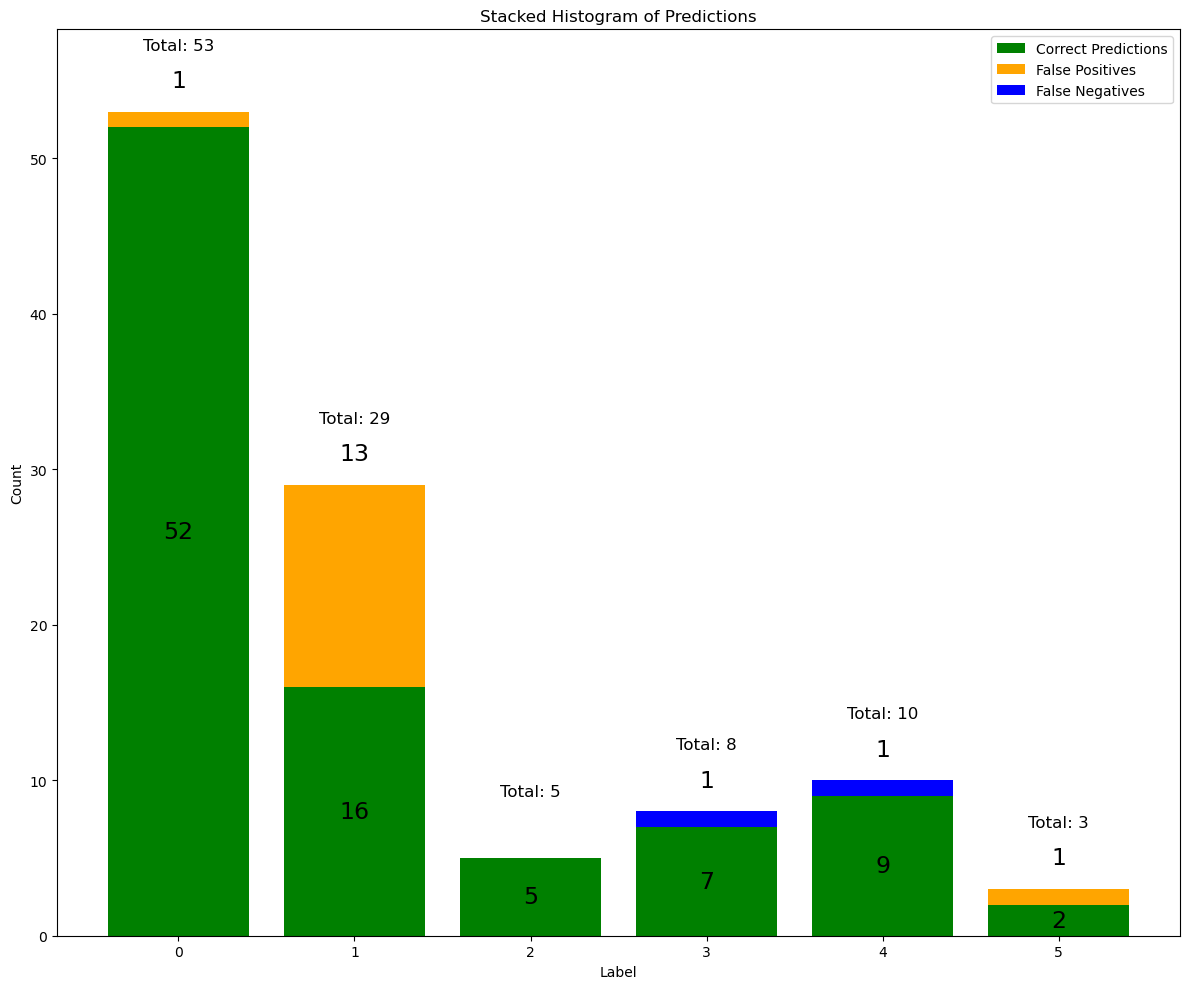

In [2]:
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
db = pd.read_csv("../nested_CV/fold_0_test_set.csv")
path = "../Elements/Boruta_RusBoost/AcrossSplits/Split0_Boruta_RusBoostFitted_pipeline.pkl"
# removing the id and the subtypes of a given dataset
def extract_PATIENT_INFO(db):
   ids =  db.pop("ID")
   morf_codificata = db.pop("morf_codificata")
   luogoTc= db.pop("luogoTC_codificato")
   return db, ids, morf_codificata, luogoTc

# extrating the label
y_test = db.pop("label")
X_test = db

loaded_pipeline = joblib.load(path) # to load the model


X_test, ids_test, morf_codificata_test, luogoTc = extract_PATIENT_INFO(X_test) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

from Components import ErrorAnalysis
ErrorAnalysis.StackedHist(predictions=predictions, y_test=y_test, morf_codificata_test=morf_codificata_test)

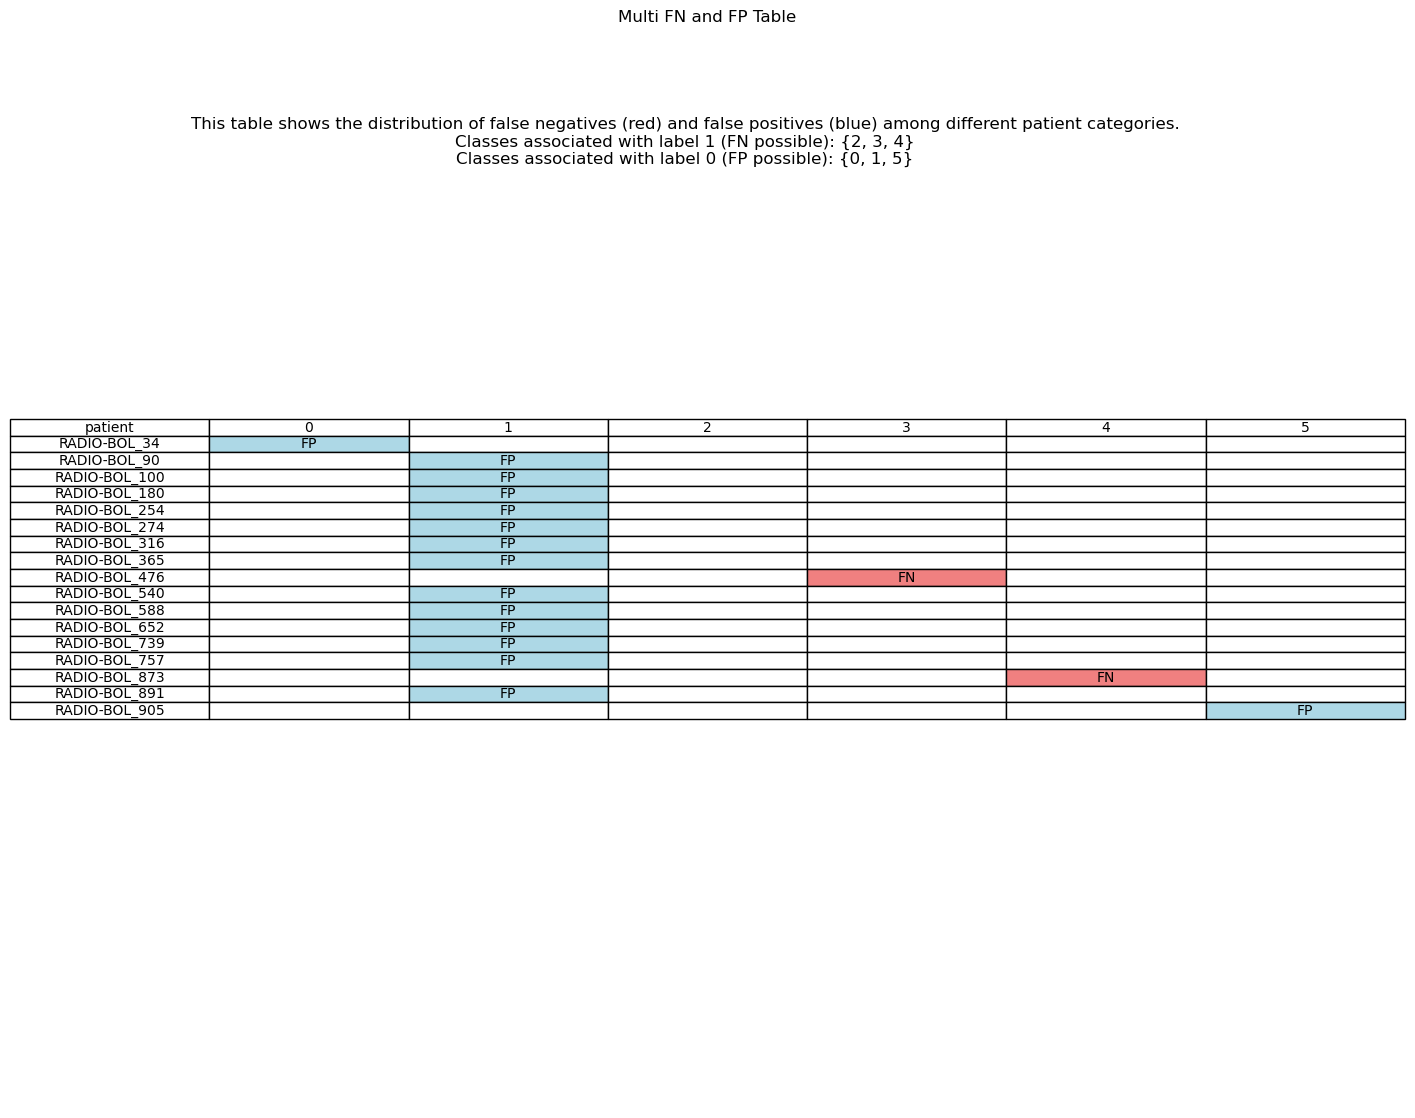

In [3]:
IDs_FN = ErrorAnalysis.IDs_FN(predictions,y_test,ids_test)
IDs_FP = ErrorAnalysis.IDs_FP(predictions,y_test,ids_test)

TableSubTypesErrors(morf_codificata_test, IDs_FN , IDs_FP , ids_test, size = "Large")

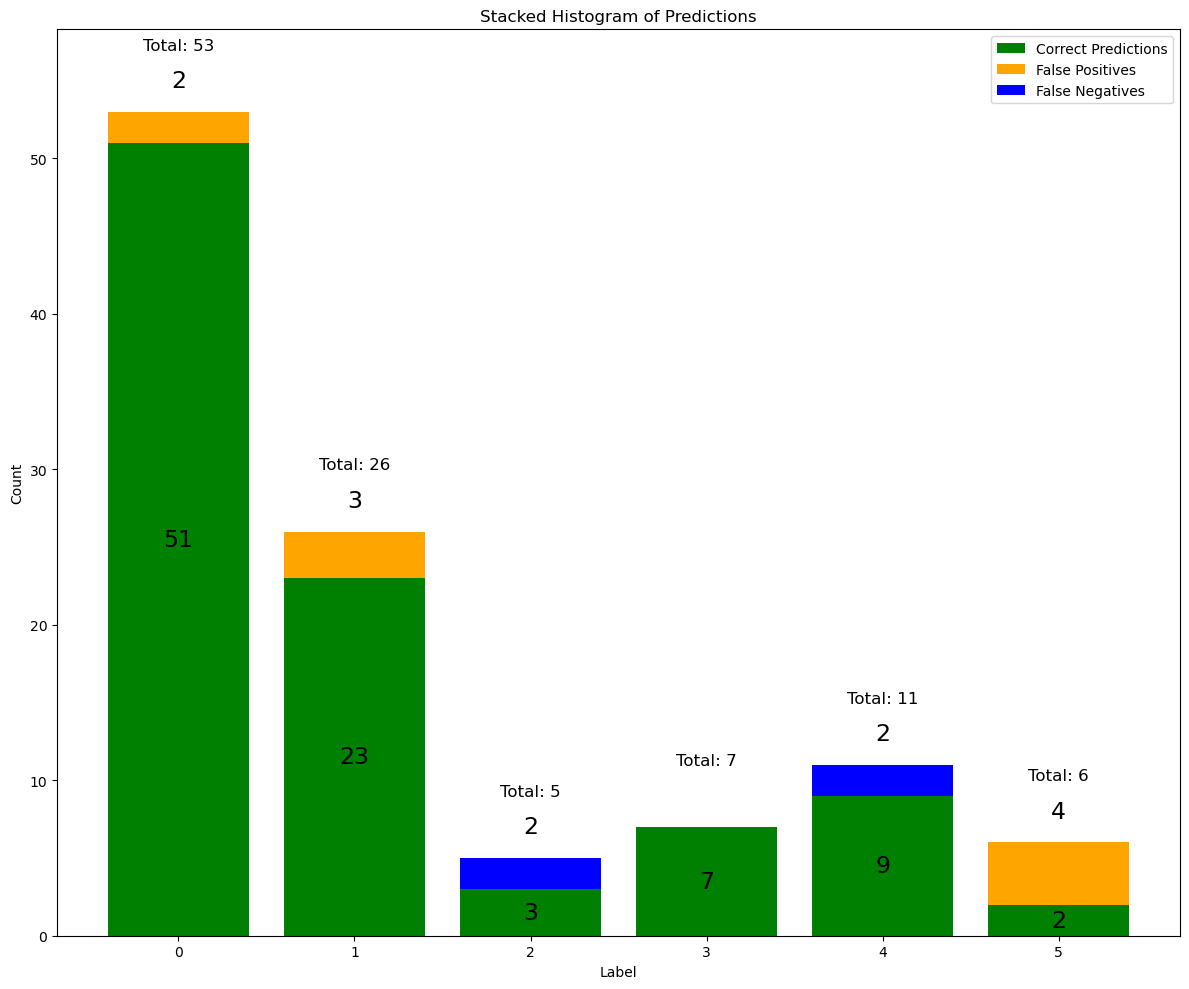

In [4]:
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
db = pd.read_csv("../nested_CV/fold_1_test_set.csv")
path = "../Elements/Boruta_RusBoost/AcrossSplits/Split1_Boruta_RusBoostFitted_pipeline.pkl"
# removing the id and the subtypes of a given dataset
def extract_PATIENT_INFO(db):
   ids =  db.pop("ID")
   morf_codificata = db.pop("morf_codificata")
   luogoTc= db.pop("luogoTC_codificato")
   return db, ids, morf_codificata, luogoTc

# extrating the label
y_test = db.pop("label")
X_test = db

loaded_pipeline = joblib.load(path) # to load the model


X_test, ids_test, morf_codificata_test, luogoTc = extract_PATIENT_INFO(X_test) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

from Components import ErrorAnalysis
ErrorAnalysis.StackedHist(predictions=predictions, y_test=y_test, morf_codificata_test=morf_codificata_test)

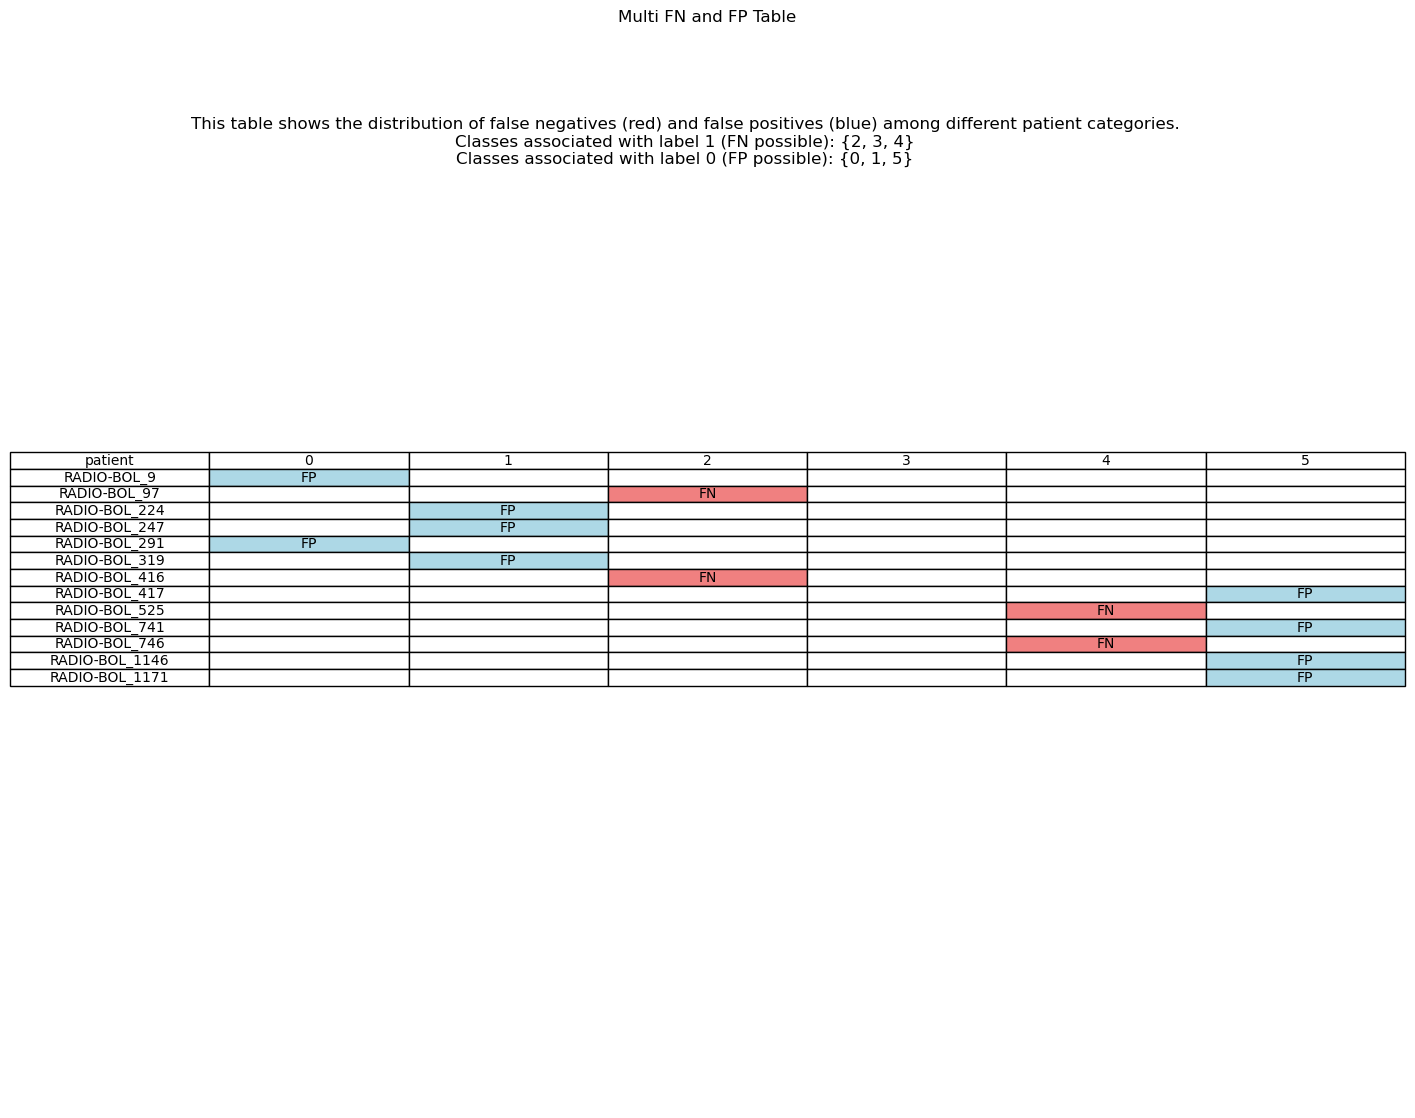

In [5]:
IDs_FN = ErrorAnalysis.IDs_FN(predictions,y_test,ids_test)
IDs_FP = ErrorAnalysis.IDs_FP(predictions,y_test,ids_test)

TableSubTypesErrors(morf_codificata_test, IDs_FN , IDs_FP , ids_test, size = "Large")

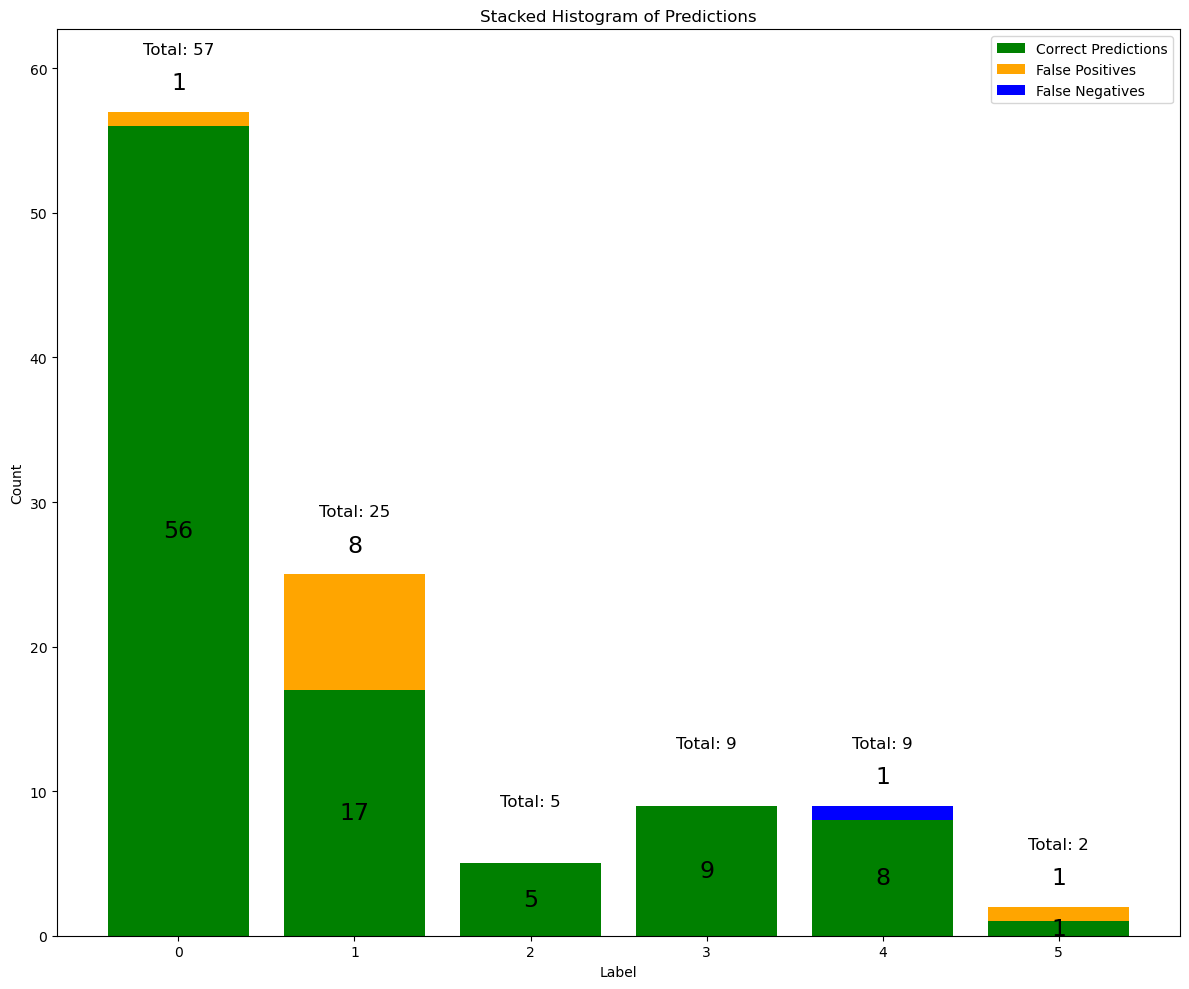

In [6]:
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
db = pd.read_csv("../nested_CV/fold_2_test_set.csv")
path = "../Elements/Boruta_RusBoost/AcrossSplits/Split2_Boruta_RusBoostFitted_pipeline.pkl"
# removing the id and the subtypes of a given dataset
def extract_PATIENT_INFO(db):
   ids =  db.pop("ID")
   morf_codificata = db.pop("morf_codificata")
   luogoTc= db.pop("luogoTC_codificato")
   return db, ids, morf_codificata, luogoTc

# extrating the label
y_test = db.pop("label")
X_test = db

loaded_pipeline = joblib.load(path) # to load the model


X_test, ids_test, morf_codificata_test, luogoTc = extract_PATIENT_INFO(X_test) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

from Components import ErrorAnalysis
ErrorAnalysis.StackedHist(predictions=predictions, y_test=y_test, morf_codificata_test=morf_codificata_test)

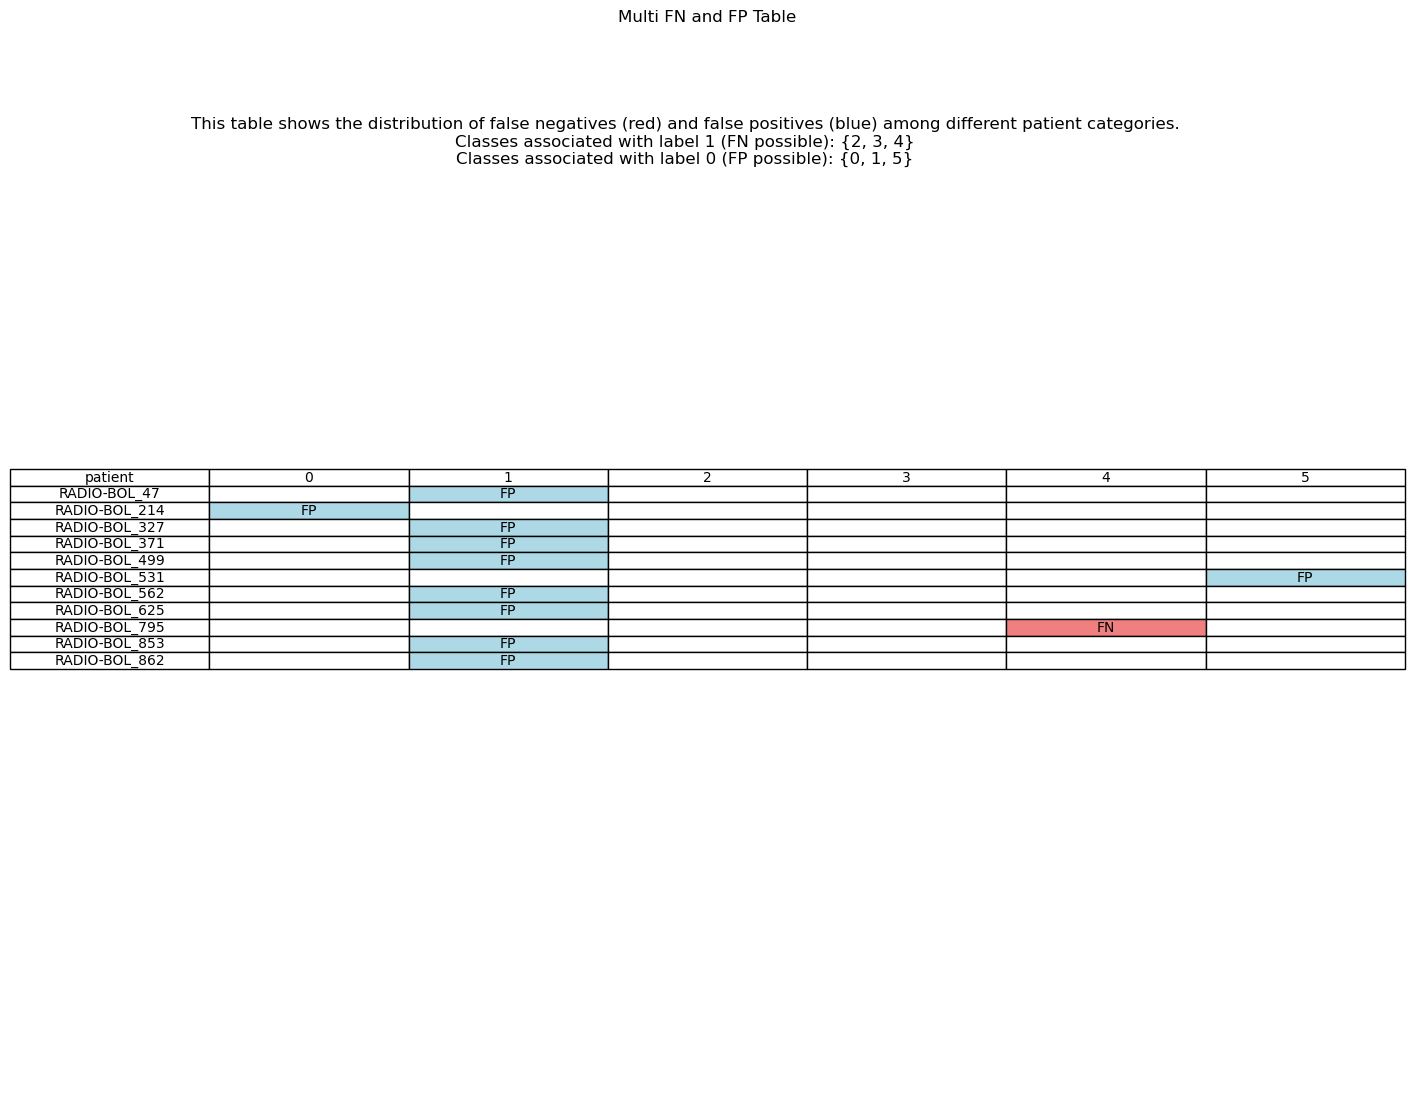

In [7]:
IDs_FN = ErrorAnalysis.IDs_FN(predictions,y_test,ids_test)
IDs_FP = ErrorAnalysis.IDs_FP(predictions,y_test,ids_test)

TableSubTypesErrors(morf_codificata_test, IDs_FN , IDs_FP , ids_test, size = "Large")

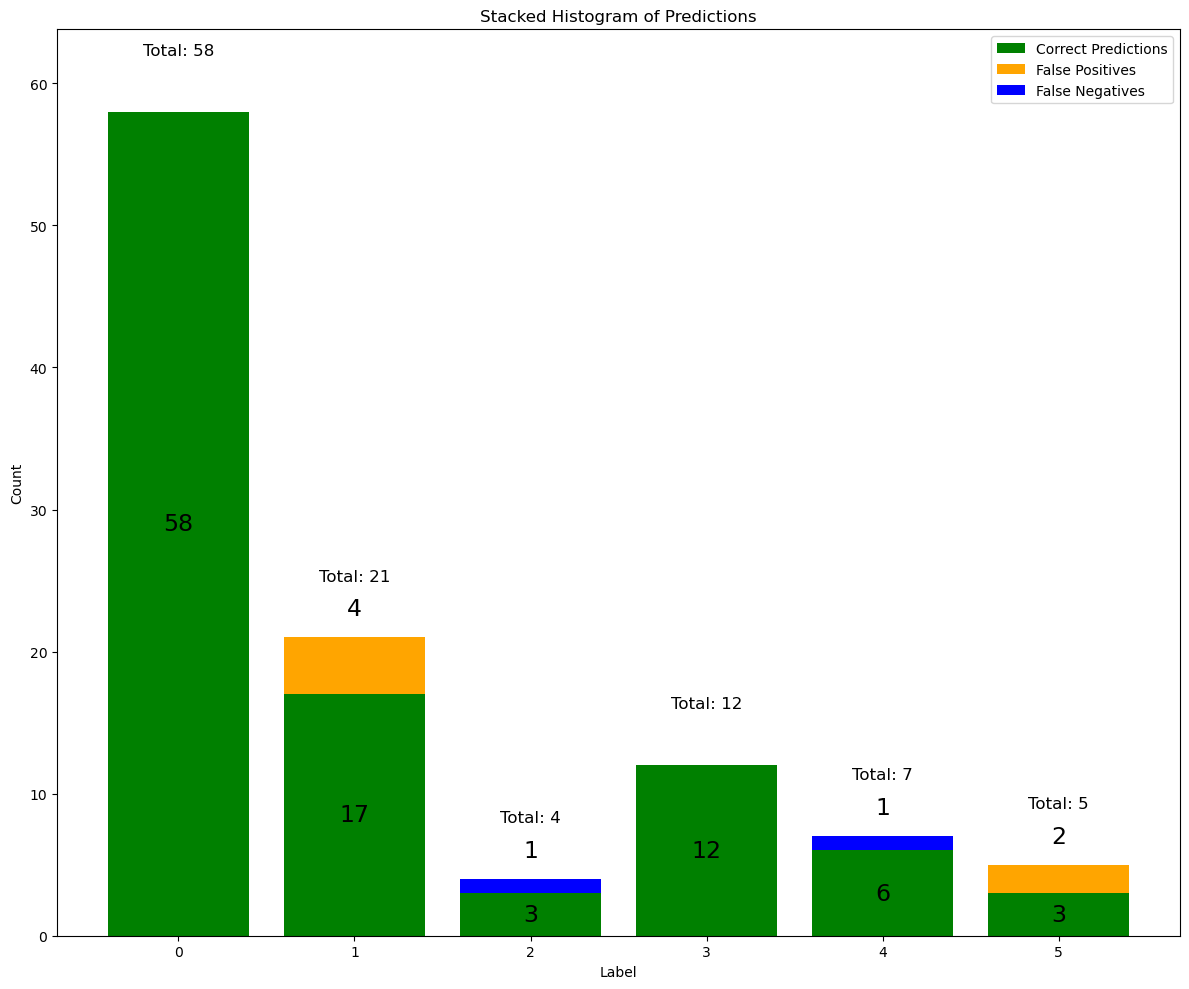

In [8]:
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
db = pd.read_csv("../nested_CV/fold_3_test_set.csv")
path = "../Elements/Boruta_RusBoost/AcrossSplits/Split3_Boruta_RusBoostFitted_pipeline.pkl"
# removing the id and the subtypes of a given dataset
def extract_PATIENT_INFO(db):
   ids =  db.pop("ID")
   morf_codificata = db.pop("morf_codificata")
   luogoTc= db.pop("luogoTC_codificato")
   return db, ids, morf_codificata, luogoTc

# extrating the label
y_test = db.pop("label")
X_test = db

loaded_pipeline = joblib.load(path) # to load the model


X_test, ids_test, morf_codificata_test, luogoTc = extract_PATIENT_INFO(X_test) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

from Components import ErrorAnalysis
ErrorAnalysis.StackedHist(predictions=predictions, y_test=y_test, morf_codificata_test=morf_codificata_test)

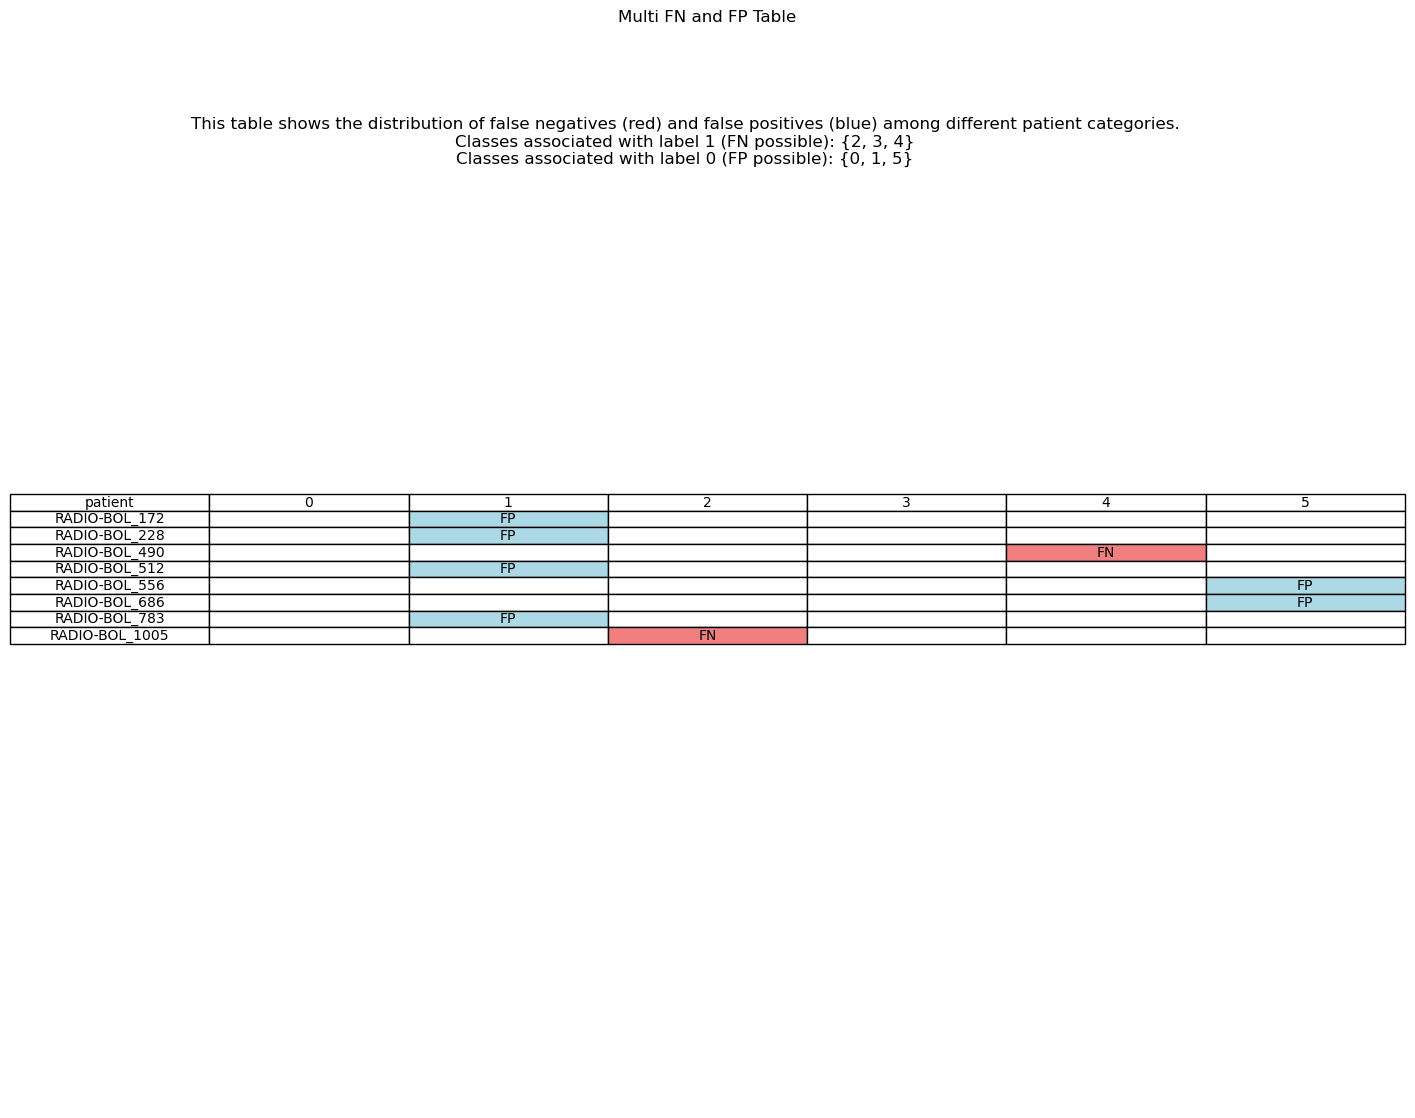

In [9]:
IDs_FN = ErrorAnalysis.IDs_FN(predictions,y_test,ids_test)
IDs_FP = ErrorAnalysis.IDs_FP(predictions,y_test,ids_test)

TableSubTypesErrors(morf_codificata_test, IDs_FN , IDs_FP , ids_test, size = "Large")

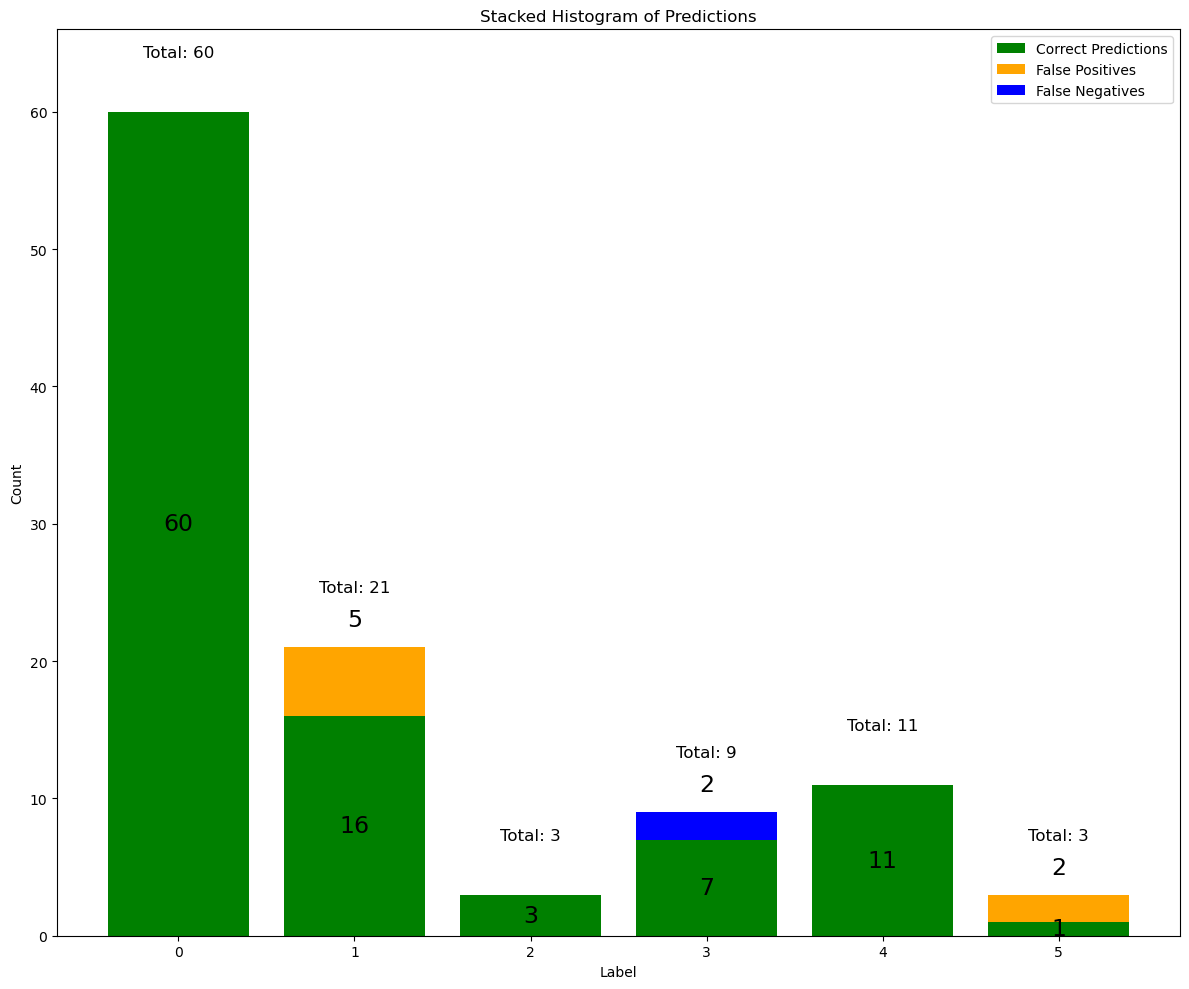

In [10]:
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
db = pd.read_csv("../nested_CV/fold_4_test_set.csv")
path = "../Elements/Boruta_RusBoost/AcrossSplits/Split4_Boruta_RusBoostFitted_pipeline.pkl"
# removing the id and the subtypes of a given dataset
def extract_PATIENT_INFO(db):
   ids =  db.pop("ID")
   morf_codificata = db.pop("morf_codificata")
   luogoTc= db.pop("luogoTC_codificato")
   return db, ids, morf_codificata, luogoTc

# extrating the label
y_test = db.pop("label")
X_test = db

loaded_pipeline = joblib.load(path) # to load the model


X_test, ids_test, morf_codificata_test, luogoTc = extract_PATIENT_INFO(X_test) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

from Components import ErrorAnalysis
ErrorAnalysis.StackedHist(predictions=predictions, y_test=y_test, morf_codificata_test=morf_codificata_test)

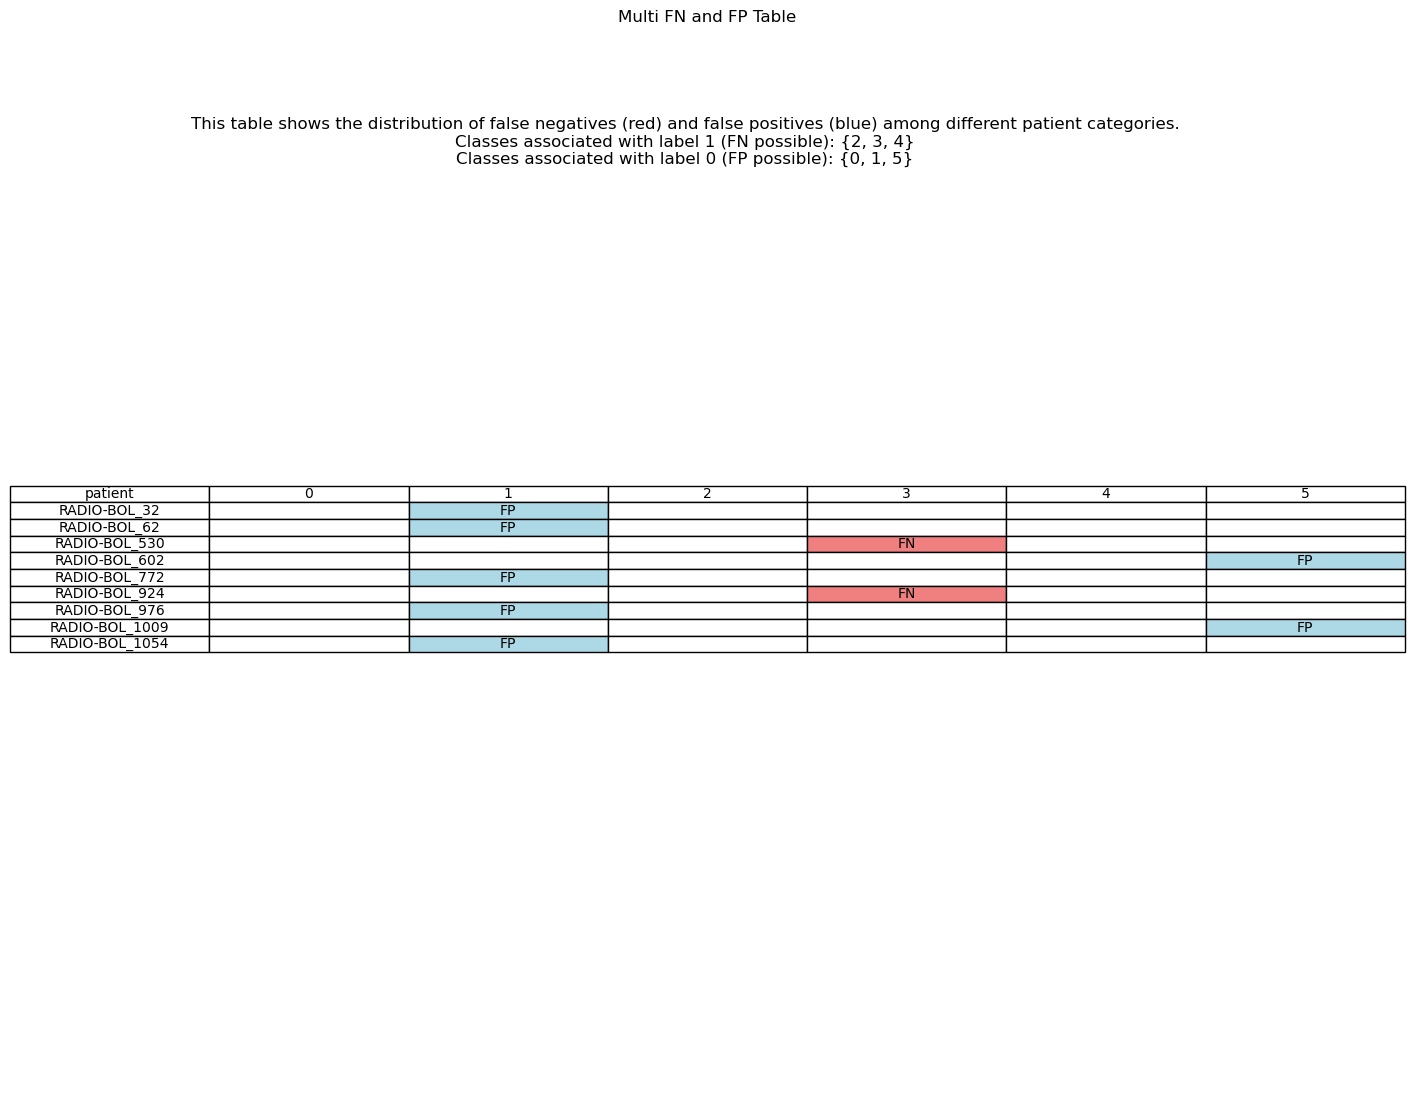

In [11]:
IDs_FN = ErrorAnalysis.IDs_FN(predictions,y_test,ids_test)
IDs_FP = ErrorAnalysis.IDs_FP(predictions,y_test,ids_test)

TableSubTypesErrors(morf_codificata_test, IDs_FN , IDs_FP , ids_test, size = "Large")